# Final Project : Multiple Linear Regression

### Topics : 

- MHC represents the mental healt but this topic is dfividfedf into two sub-topic, meantal health at work or at home, both containing several variables: the emotional well being, the social well being andf the psychological well being. For exemple MHCC1 represents the emotional well being in the private life of an indfividfual
- NE andf PE represents respectively negative andf positive emotions, both containing several variables which are dfifferent emotions
- Force is the dfifferent facets of character strenghs andf has also dfifferent variables, for example force1 is creativity
- FQ is tegh frequency of use of character strenghs, 
- Flux represents the flow, perfomance of the activity of the indfividfual

All of these topics with dfifferent variables madfe that we have a very large dfataset so in ordfer to condfuct a goodf analysis we will analyse each topic one by one andf apply a PCA analysis to see what variables are the most relevant regardfing each topic.

## Consigne

Create several quantitative variables by computing the aggregatedf score for each topic :

- For each factor andf its correspondfing (questionnaire) items, compute the aggregatedf scores as the average of those items

At this stage the indfividfual items are no longer usedf in the analyses as they are all replacedf by their aggregatedf scores.

Buildf a MLR modfel predficting Flow-Performance & Mastery from all the other scores. Select the best, most parsimonious modfels andf check the condfitions for inference.

## Loading the dataset 

In [113]:
import os
import pandas as pd
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

In [78]:
try:
    dir_path = r"/Users/clement.guiraud/desktop/data analysis/data analysis track/Python/FINAL_PROJECT_Advanced Statistics for data Science_/dATA"
    os.chdir(dfir_path)
except:
    dfir_path = r"/Users/clement.guiraud/desktop/data analysis/data analysis track/Python/FINAL_PROJECT_Advanced Statistics for data Science_/dATA"
    os.chdir(dir_path)

In [79]:
# change working dfirectory
os.getcwd()

'/Users/clement.guiraud/Desktop/Data analysis/Data analysis track/Python/FINAL_PROJECT_Advanced Statistics for Data Science_/DATA'

In [80]:
# readf the dfataset
df = pd.read_excel("FINAL_dTS_Version.xlsx", index_col=0)

df = df.replace(r'^\s*$', np.nan, regex=True)
df = df.replace('', np.nan, regex=True)

# Assign to row andf column the size of instances & variables
row, col = df.shape

# Get all variables names in a list
column_names = list(df)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283 entries, 0 to 282
Columns: 103 entries, TAILLE to MODERATE_HOME
dtypes: int64(89), object(14)
memory usage: 229.9+ KB


,TAILLE,ANCIENNETE,AGE,SEX,SITUFAM,NBENFANT,NIVEAUETUDE,MHCB1,MHCC1,MHCB2,MHCC2,MHCB3,MHCC3,MHCB4,MHCC4,MHCB5,MHCC5,MHCB6,MHCC6,MHCB7,MHCC7,MHCB8,MHCC8,MHCB9,MHCC9,MHCB10,MHCC10,MHCB11,MHCC11,MHCB12,MHCC12,MHCB13,MHCC13,MHCB14,MHCC14,PE1,NE1,NE2,PE2,NE3,NE4,PE3,NE5,NE6,PE4,PE5,PE6,PE7,PE8,PE9,NE7,NE8,PE10,NE9,NE10,Force1,Force2,Force3,Force4,Force5,Force6,Force7,Force8,Force9,Force10,Force11,Force12,Force13,Force14,Force15,Force16,Force17,Force18,Force19,Force20,Force21,Force22,Force23,Force24,FQ1,FQ2,FQ3,Flux1,Flux2,Flux3,Flux4,Flux5,Flux6,Flux7,Flux8,Flux9,Flux10,PERCENTAGE_OF_EMPTY_VALUES_BY_ROW,SECTEUR,FONCTION,FORMATION,EMOTIONAL_FLOURISHING,FLOURISHING_PRO,FLOURISHING_HOME,LANGUISHING_PRO,LANGUISHING_HOME,MODERATE_PRO,MODERATE_HOME
0,50-249 employees,4,35,FEMALE,PARTNER RELATIONSHIP,2,Licence,5,5,5,5,5,6,6,5,6,5,5,5,5,5,5,5,5,5,5,5,5,6,6,5,5,5,6,6,3,4,2,4,1,1,2,2,3,4,4,4,4,4,4,3,2,4,3,3,4,5,4,4,4,5,4,4,4,4,5,4,4,4,4,4,4,4,3,3,4,5,4,4,4,3,5,3,4,4,4,4,4,4,4,4,5,38,NaN,NaN,NaN,Emotionally languishing,Yes flourishing (PRO),Yes flourishing (HOME),No languishing (PRO),No languishing (HOME),No moderate (PRO),No moderate (HOME)
1,10-49 employees,3,39,FEMALE,PARTNER RELATIONSHIP,1,"DEA, DESS, M2, Doctorat",5,3,6,6,5,5,6,6,4,3,4,4,2,2,2,2,4,4,5,5,4,3,5,4,5,5,6,5,2,3,2,3,1,1,5,3,2,4,4,3,4,2,4,3,1,3,2,1,4,4,4,4,4,5,3,4,4,4,4,3,4,4,4,3,4,4,4,4,4,4,4,4,3,3,4,3,3,4,4,4,3,4,4,4,5,39,NaN,NaN,NaN,Emotionally languishing,No flourishing (PRO),No flourishing (HOME),No languishing (PRO),No languishing (HOME),Yes moderate (PRO),Yes moderate (HOME)
2,≥ 500 employees,5,45,MALE,SEPARATED / DIVORCED,1,"Maîtrise, M1…",5,5,5,5,5,5,5,6,6,5,2,4,2,3,3,3,3,3,3,4,4,6,5,5,6,6,6,6,6,3,2,4,3,3,4,2,3,4,4,4,4,4,4,2,3,4,3,3,4,4,4,4,4,4,4,4,4,5,4,4,4,4,4,3,4,4,4,3,4,4,5,4,3,3,5,3,3,4,4,3,3,4,4,4,5,39,NaN,NaN,NaN,Emotionally languishing,No flourishing (PRO),No flourishing (HOME),No languishing (PRO),No languishing (HOME),Yes moderate (PRO),Yes moderate (HOME)
3,≥ 500 employees,10,45,FEMALE,PARTNER RELATIONSHIP,2,"DEA, DESS, M2, Doctorat",2,1,2,4,2,2,2,3,1,6,1,6,3,5,1,1,6,6,1,5,2,5,5,5,5,6,1,2,3,4,1,4,1,1,6,1,2,3,3,2,4,3,2,3,3,3,2,1,3,4,3,3,3,4,3,3,3,4,4,4,4,2,3,3,5,4,3,4,4,4,4,4,2,2,3,2,2,3,3,3,3,3,4,2,2,41,NaN,NaN,NaN,Emotionally languishing,No flourishing (PRO),No flourishing (HOME),No languishing (PRO),Yes languishing (HOME),Yes moderate (PRO),No moderate (HOME)
4,1-10 employees,1,39,MALE,PARTNER RELATIONSHIP,0,"DEA, DESS, M2, Doctorat",3,6,3,5,3,6,2,3,3,2,2,3,2,3,2,3,2,3,3,3,4,4,3,3,3,4,2,5,3,3,3,3,3,2,3,3,4,4,3,4,4,5,5,2,2,4,2,2,3,4,4,4,3,4,3,4,4,4,4,3,3,3,3,3,4,3,2,4,4,4,4,2,3,2,4,2,2,3,3,2,3,3,4,4,3,41,NaN,NaN,NaN,Emotionally languishing,No flourishing (PRO),No flourishing (HOME),No languishing (PRO),No languishing (HOME),Yes moderate (PRO),Yes moderate (HOME)


In [81]:
df.describe()

,ANCIENNETE,AGE,NBENFANT,MHCB1,MHCC1,MHCB2,MHCC2,MHCB3,MHCC3,MHCB4,MHCC4,MHCB5,MHCC5,MHCB6,MHCC6,MHCB7,MHCC7,MHCB8,MHCC8,MHCB9,MHCC9,MHCB10,MHCC10,MHCB11,MHCC11,MHCB12,MHCC12,MHCB13,MHCC13,MHCB14,MHCC14,PE1,NE1,NE2,PE2,NE3,NE4,PE3,NE5,NE6,PE4,PE5,PE6,PE7,PE8,PE9,NE7,NE8,PE10,NE9,NE10,Force1,Force2,Force3,Force4,Force5,Force6,Force7,Force8,Force9,Force10,Force11,Force12,Force13,Force14,Force15,Force16,Force17,Force18,Force19,Force20,Force21,Force22,Force23,Force24,FQ1,FQ2,FQ3,Flux1,Flux2,Flux3,Flux4,Flux5,Flux6,Flux7,Flux8,Flux9,Flux10,PERCENTAGE_OF_EMPTY_VALUES_BY_ROW
count,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000
mean,8.770318,41.681979,0.964664,3.823322,4.540636,4.098940,4.618375,3.575972,4.356890,3.537102,3.515901,3.325088,3.480565,2.477032,2.883392,2.876325,3.441696,2.731449,2.975265,3.883392,4.017668,4.314488,4.445230,4.169611,4.597173,3.713781,4.042403,4.233216,4.628975,3.855124,4.575972,3.918728,3.469965,1.749117,2.886926,1.628975,1.667845,3.431095,1.996466,2.084806,3.498233,3.056537,4.148410,4.031802,4.183746,3.770318,2.678445,2.134276,3.448763,3.081272,1.915194,3.720848,4.166078,4.169611,4.286219,4.074205,4.720848,3.886926,4.162544,4.162544,4.438163,4.607774,4.275618,4.307420,3.689046,4.565371,3.505300,4.402827,4.070671,3.674912,4.014134,4.134276,4.130742,4.537102,3.455830,3.925795,2.321555,4.413428,3.328622,3.830389,4.293286,4.293286,3.657244,3.611307,4.219081,4.360424,4.187279,4.045936,7.932862
std,7.599942,8.923906,0.955845,1.273246,1.188423,1.303609,1.203989,1.338355,1.292304,1.557822,1.407526,1.752498,1.573994,1.407428,1.410638,1.305568,1.251649,1.259841,1.292130,1.165631,1.143765,1.183531,1.088139,1.208508,1.104597,1.470534,1.256883,1.244289,1.075258,1.569953,1.380097,1.295287,1.076003,0.917109,1.191551,0.883342,0.896758,1.222436,0.924444,1.051788,1.250176,1.306144,1.175649,1.186080,1.397116,1.182123,1.116826,1.109114,1.249123,1.171667,0.879161,1.319449,1.189783,1.205570,1.110581,1.178173,1.150003,1.243966,1.221154,1.215332,1.054655,1.122723,1.111675,1.217855,1.387170,1.166222,1.353669,1.179130,1.255607,1.320987,1.352622,1.204156,1.315702,1.212173,1.758664,1.156912,1.064812,1.146424,1.442071,1.326033,1.121450,1.332434,1.566213,1.420773,1.035568,1.057289,1.233507,1.358455,11.334333
min,1.000000,20.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,3.000000,36.00000

### Computing mean aggregated modalities

In [119]:
df['MHCB_avg'] = df[['MHCB1', 'MHCB2', "MHCB3", "MHCB4", "MHCB5", "MHCB6", "MHCB7", "MHCB8", "MHCB9", "MHCB10", "MHCB11", "MHCB12", "MHCB13", "MHCB14"]].mean(axis = 1)
df['MHCC_avg'] = df[['MHCC1', 'MHCC2', "MHCC3", "MHCC4", "MHCC5", "MHCC6", "MHCC7", "MHCC8", "MHCC9", "MHCC10", "MHCC11", "MHCC12", "MHCC13", "MHCC14"]].mean(axis = 1)
df['PE_avg'] = df[["PE1", "PE2", "PE3", "PE4", "PE5", "PE6", "PE7", "PE8", "PE9", "PE10"]].mean(axis = 1)
df['NE_avg'] = df[["NE1", "NE2", "NE3", "NE4", "NE5", "NE6", "NE7", "NE8", "NE9", "NE10"]].mean(axis = 1)
df['Force_avg'] = df[["Force1", "Force2", "Force3", "Force4", "Force5", "Force6", "Force7", "Force8", "Force9", "Force10","Force11", "Force12", "Force13", "Force14", "Force15", "Force16", "Force17", "Force18", "Force19", "Force20", "Force21", "Force22", "Force23", "Force24"]].mean(axis = 1)
df['FQ_avg'] = df[["FQ1", "FQ2", "FQ3"]].mean(axis = 1)
df['Flux_avg'] = df[["Flux1", "Flux2", "Flux3", "Flux4", "Flux5", "Flux6", "Flux7", "Flux8", "Flux9", "Flux10"]].mean(axis = 1)

### Getting rid of useless modalities

In [120]:
df_agg = df[['NBENFANT', 'SEX', 'TAILLE', 'ANCIENNETE', 'AGE', 'SITUFAM', 'NIVEAUETUDE', 'MHCB_avg', 'MHCC_avg', 'PE_avg', 'NE_avg', 'Force_avg', 'FQ_avg', 'Flux_avg']]
df_agg

,NBENFANT,SEX,TAILLE,ANCIENNETE,AGE,SITUFAM,NIVEAUETUDE,MHCB_avg,MHCC_avg,PE_avg,NE_avg,Force_avg,FQ_avg,Flux_avg
0,2,FEMALE,50-249 employees,4,35,PARTNER RELATIONSHIP,Licence,5.285714,5.214286,3.7,2.4,4.083333,4.000000,4.0
1,1,FEMALE,10-49 employees,3,39,PARTNER RELATIONSHIP,"DEA, DESS, M2, Doctorat",4.500000,4.071429,3.4,1.9,3.916667,3.333333,3.8
2,1,MALE,≥ 500 employees,5,45,SEPARATED / DIVORCED,"Maîtrise, M1…",4.285714,4.714286,4.2,2.7,4.000000,3.666667,3.7
3,2,FEMALE,≥ 500 employees,10,45,PARTNER RELATIONSHIP,"DEA, DESS, M2, Doctorat",2.428571,4.071429,3.3,1.9,3.541667,2.333333,2.7
4,0,MALE,1-10 employees,1,39,PARTNER RELATIONSHIP,"DEA, DESS, M2, Doctorat",2.642857,3.785714,3.8,2.6,3.458333,3.000000,2.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,1,FEMALE,10-49 employees,9,45,SEPARATED / DIVORCED,"Maîtrise, M1…",5.357143,4.071429,4.8,2.6,4.958333,5.666667,5.5
279,1,FEMALE,50-249 employees,1,37,SEPARATED / DIVORCED,"Maîtrise, M1…",3.928571,2.571429,1.9,3.6,3.791667,2.000000,4.2
280,1,FEMALE,50-249 employees,10,42,PARTNER RELATIONSHIP,"Maîtrise, M1…",4.857143,5.142857,4.1,1.9,4.166667,4.666667,4.5
281,1,FEMALE,10-49 employees,12,45,SEPARATED / DIVORCED,"Maîtrise, M1…",4.357143,4.928571,3.4,1.3,4.041667,3.666667,5.3


## Multi Linear Regression (MLP)


## Recap of the modalities : 

We now have 7 new quantitative modalities rated from 1 to 6 (1 = low, 6 = high)
- MHCB : measure PMH in professional life 
- MHCC : measure PMH in personal life
- PE : measure positive emotions
- NE : measure negative emotions
- Force : measure the different facets of character strenghts
- FQ : frequency of use of the character strenghts
- Flow : measure flow, performance and mastery

#### The aim of the following analysis is to determine which factors influence the Flow modality of any given individual.

## Describing the target of inference

One of the first steps of this Exploratory Data Analysis is to examine the target of inference ( Flow ) in isolation.

/Users/clement.guiraud/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Flux_avg', ylabel='Density'>

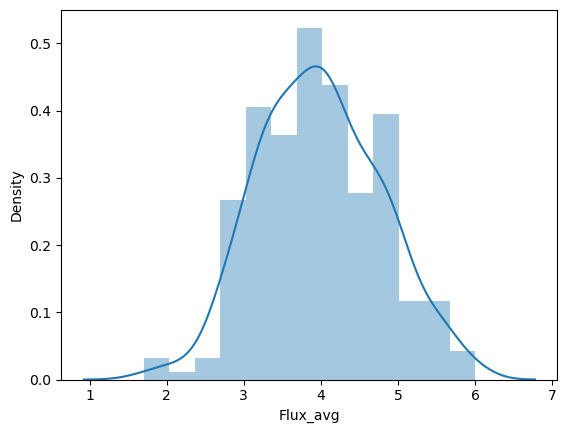

In [121]:
sns.distplot(df_agg.Flux_avg)

A large portion of individuals have an average flow of 4, and the curves resembles a normal distribution. 

## Pairwise correlations

A correlation matrix will be created in order to visualize the relationships among the numerical predictors and the target of inference.

([<matplotlib.axis.YTick at 0x7ff597115b50>,
 [Text(0, 0, 'NBENFANT'),
  Text(0, 1, 'ANCIENNETE'),
  Text(0, 2, 'AGE'),
  Text(0, 3, 'MHCB_avg'),
  Text(0, 4, 'MHCC_avg'),
  Text(0, 5, 'PE_avg'),
  Text(0, 6, 'NE_avg'),
  Text(0, 7, 'Force_avg'),
  Text(0, 8, 'FQ_avg'),
  Text(0, 9, 'Flux_avg')])

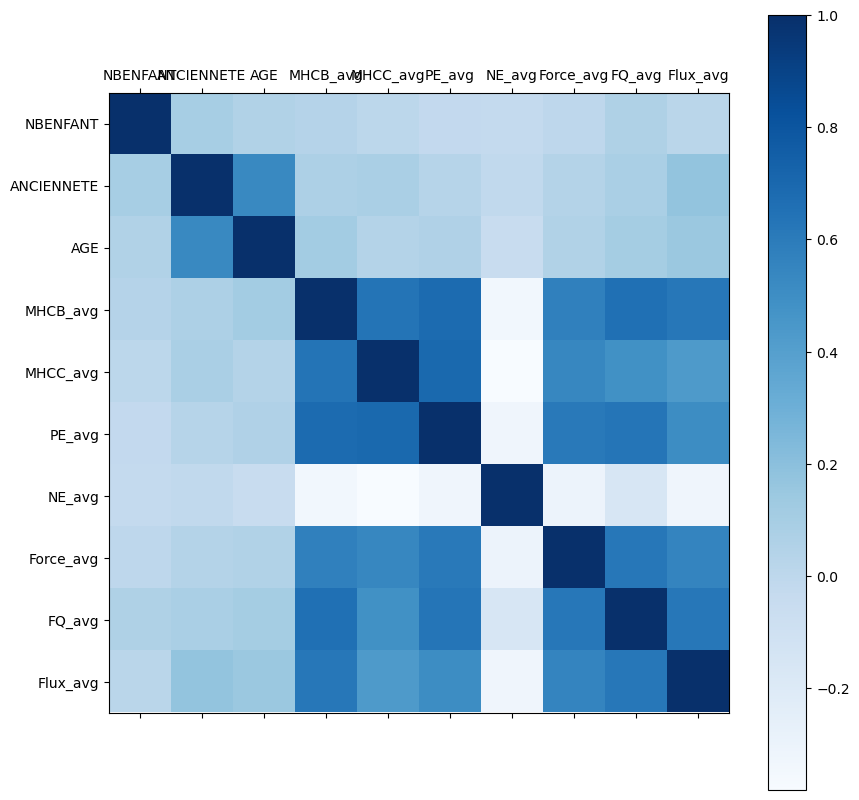

In [122]:
df_agg_int = df_agg.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10,10))
plt.matshow(df_agg_int.corr(), cmap=plt.cm.Blues, fignum=1)
plt.colorbar()
tick_marks = [i for i in range(len(df_agg_int.columns))]
plt.xticks(tick_marks, df_agg_int.columns)
plt.yticks(tick_marks, df_agg_int.columns)

Relations between variable doesn't seem too high ; there are low risks of colinearity issues.

Based on the correlation matrix, Flow appears to be moderately correlated with MHCB. In addition, FQ and MHCB are highly correlated with each other, and they both have a relationship with PE.

However, this matrix does not confirm whether the correlation coefficients are statistically significant, hence further investigation is necessary.

In [123]:
from scipy.stats import pearsonr
r1, p1 = pearsonr(df_agg.Flux_avg, df_agg.MHCB_avg)
msg = "Correlation coefficient Flow-MHCB: {}\n p-value: {}\n"
print(msg.format(r1, p1))

r2, p2 = pearsonr(df_agg.FQ_avg, df_agg.MHCB_avg)
msg = "Correlation coefficient FQ-MHCB: {}\n p-value: {}\n"
print(msg.format(r2, p2))

r3, p3 = pearsonr(df_agg.FQ_avg, df_agg.PE_avg)
msg = "Correlation coefficient FQ-PE: {}\n p-value: {}\n"
print(msg.format(r3, p3))

r4, p4 = pearsonr(df_agg.MHCB_avg, df_agg.PE_avg)
msg = "Correlation coefficient MHCB-PE: {}\n p-value: {}\n"
print(msg.format(r4, p4))

Correlation coefficient Flow-MHCB: 0.6216944091764642
 p-value: 1.171589898231369e-31

Correlation coefficient FQ-MHCB: 0.6586335098128613
 p-value: 1.4094408879104711e-36

Correlation coefficient FQ-PE: 0.6310300747983191
 p-value: 7.726784914888389e-33

Correlation coefficient MHCB-PE: 0.6824183124954185
 p-value: 3.942962662391715e-40



All the relationships are significant.

We will now examine the categorical variables and their relationship to balance.

NIVEAUETUDE
BAC                        AxesSubplot(0.555556,0.11;0.344444x0.334783)
DEA, DESS, M2, Doctorat    AxesSubplot(0.555556,0.11;0.344444x0.334783)
DUT, BTS, ..               AxesSubplot(0.555556,0.11;0.344444x0.334783)
Licence                    AxesSubplot(0.555556,0.11;0.344444x0.334783)
Maîtrise, M1…              AxesSubplot(0.555556,0.11;0.344444x0.334783)
inf BAC                    AxesSubplot(0.555556,0.11;0.344444x0.334783)
Name: Flux_avg, dtype: object

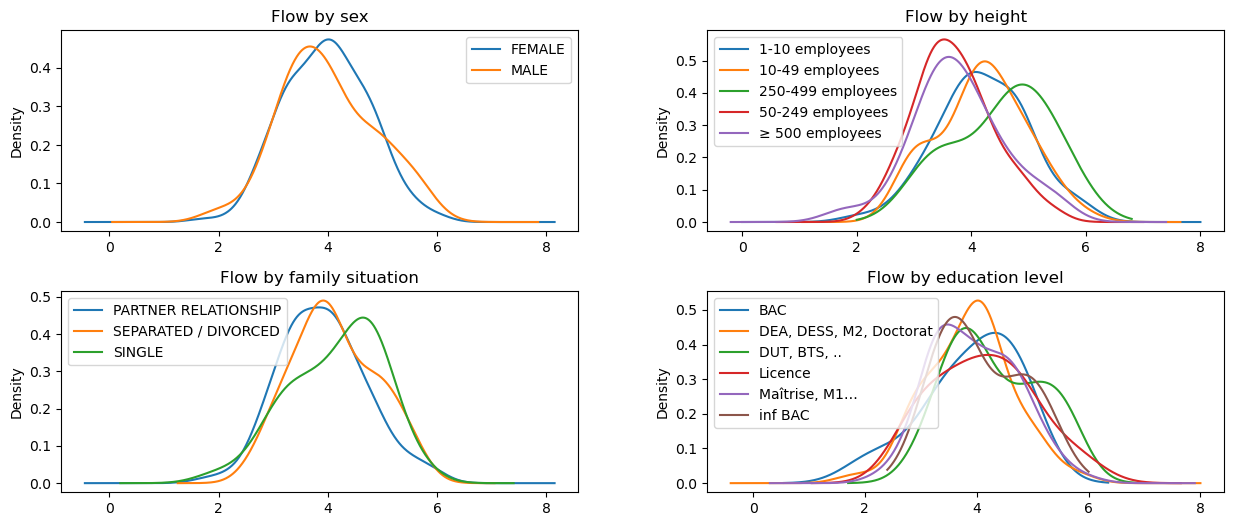

In [124]:
f, axes = plt.subplots(2, 2, figsize=(15, 6))
f.subplots_adjust(hspace=.3, wspace=.25)
df_agg.groupby('SEX').Flux_avg.plot(kind='kde', ax=axes[0][0], legend=True, title='Flow by sex')
df_agg.groupby('TAILLE').Flux_avg.plot(kind='kde', ax=axes[0][1], legend=True, title='Flow by height')
df_agg.groupby('SITUFAM').Flux_avg.plot(kind='kde', ax=axes[1][0], legend=True, title='Flow by family situation')
df_agg.groupby('NIVEAUETUDE').Flux_avg.plot(kind='kde', ax=axes[1][1], legend=True, title='Flow by education level')

No variable seem to influence the distribution of Flow.

## Multivariable Regression Modelling


After visually examining the predictors and their relationship with Flow, regression models can be fit using those predictors. 

feature selection will be used to determine which combination of variables best predicts Flow.

Given the choice of 14 predictors, the initial model could include all of them - since we established there was no colinearity issue. 

The Ordinary Least Square algorithm is used to create the linear regression model.

In [125]:
mod0 = smf.ols('Flux_avg ~ NBENFANT + SEX + TAILLE + ANCIENNETE + AGE + SITUFAM + NIVEAUETUDE + MHCB_avg + MHCC_avg + PE_avg + NE_avg + Force_avg + FQ_avg', data = df_agg).fit()
mod0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Flux_avg   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     16.44
Date:                Thu, 23 Mar 2023   Prob (F-statistic):           1.42e-36
Time:                        18:46:17   Log-Likelihood:                -217.32
No. Observations:                 283   AIC:                             478.6
Df Residuals:                     261   BIC:                             558.8
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  1.9028      0.406      4.685      0.000       1.103       2.703
SEX[T.MALE]                               -0.0007      0.077     -0.009      0.993      -0.152       0.151
TAILLE[T.10-49 employees]                 -0.1473      0.098     -1.506      0.133      -0.340       0.045
TAILLE[T.250-499 employees]                0.2770      0.180      1.539      0.125      -0.077       0.631
TAILLE[T.50-249 employees]                -0.2749      0.099     -2.787      0.006      -0.469      -0.081
TAILLE[T.≥ 500 employees]                 -0.1734      0.107     -1.627      0.105      -0.383       0.036
SITUFAM[T.SEPARATED / DIVORCED]            0.2914      0.089      3.273      0.001       0.116       0.467
SITUFAM[T.SINGLE]                          0.2695      0.111      2.421      0.016       0.050       0.489
NIVEAUETUDE[T.DEA, DESS, M2, Doctorat]    -0.0058      0.151     -0.038      0.969      -0.304       0.292
NIVEAUETUDE[T.DUT, BTS, ..]                0.1879      0.170      1.102      0.271      -0.148       0.524
NIVEAUETUDE[T.Licence]                     0.0293      0.175      0.168      0.867      -0.315       0.374
NIVEAUETUDE[T.Maîtrise, M1…]               0.1168      0.154      0.756      0.450      -0.187       0.421
NIVEAUETUDE[T.inf BAC]                     0.1005      0.244      0.412      0.681      -0.380       0.581
NBENFANT                                   0.0078      0.038      0.208      0.835      -0.066       0.082
ANCIENNETE                                 0.0135      0.005      2.611      0.010       0.003       0.024
AGE                                       -0.0038      0.005     -0.802      0.423      -0.013       0.005
MHCB_avg                                   0.2519      0.055      4.562      0.000       0.143       0.361
MHCC_avg                                  -0.0436      0.060     -0.724      0.470      -0.162       0.075
PE_avg                                    -0.0177      0.062     -0.288      0.774      -0.139       0.104
NE_avg                                    -0.1508      0.061     -2.488      0.013      -0.270      -0.031
Force_avg                                  0.2190      0.066      3.300      0.001       0.088       0.350
FQ_avg                                     0.2368      0.055      4.270      0.000       0.128       0.346
==============================================================================
Omnibus:                        8.369   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.015   Jarque-Bera (JB):               12.722
Skew:                          -0.166   Prob(JB):                      0.00173
Kurtosis:                       3.984   Cond. No.                         603.
=============

This first model has very low efficiency. 

The sex and the education level do not have a significant impact on the emotion flow. Same for height, number of children, age, PMH in private life, and positive emotions.

All other variables are positively related to Flow, such as character strengh, implying that the more emotional strength we have, the more control on our emotional flow. 

Let's build another model by excluding the variables with a high p-value.

In [126]:
mod1 = smf.ols('Flux_avg ~ ANCIENNETE + SITUFAM + MHCB_avg + NE_avg + Force_avg + FQ_avg', data = df_agg).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Flux_avg   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     46.34
Date:                Thu, 23 Mar 2023   Prob (F-statistic):           4.49e-43
Time:                        18:49:50   Log-Likelihood:                -226.30
No. Observations:                 283   AIC:                             468.6
Df Residuals:                     275   BIC:                             497.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           1.4362      0.286      5.030      0.000       0.874       1.998
SITUFAM[T.SEPARATED / DIVORCED]     0.2717      0.082      3.306      0.001       0.110       0.433
SITUFAM[T.SINGLE]                   0.2983      0.099      2.999      0.003       0.102       0.494
ANCIENNETE                          0.0118      0.004      2.724      0.007       0.003       0.020
MHCB_avg                            0.2394      0.049      4.886      0.000       0.143       0.336
NE_avg                             -0.1351      0.057     -2.373      0.018      -0.247      -0.023
Force_avg                           0.2102      0.064      3.299      0.001       0.085       0.336
FQ_avg                              0.2569      0.052      4.912      0.000       0.154       0.360
==============================================================================
Omnibus:                        5.372   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                7.272
Skew:                          -0.085   Prob(JB):                       0.0264
Kurtosis:                       3.767   Cond. No.                         117.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now all the variables are significant, but the R-squared has, in fact, decreased.

The potential relationships among these 6 variables should be analyzed.

<AxesSubplot:title={'center':'Force and FQ'}, xlabel='Force_avg', ylabel='FQ_avg'>

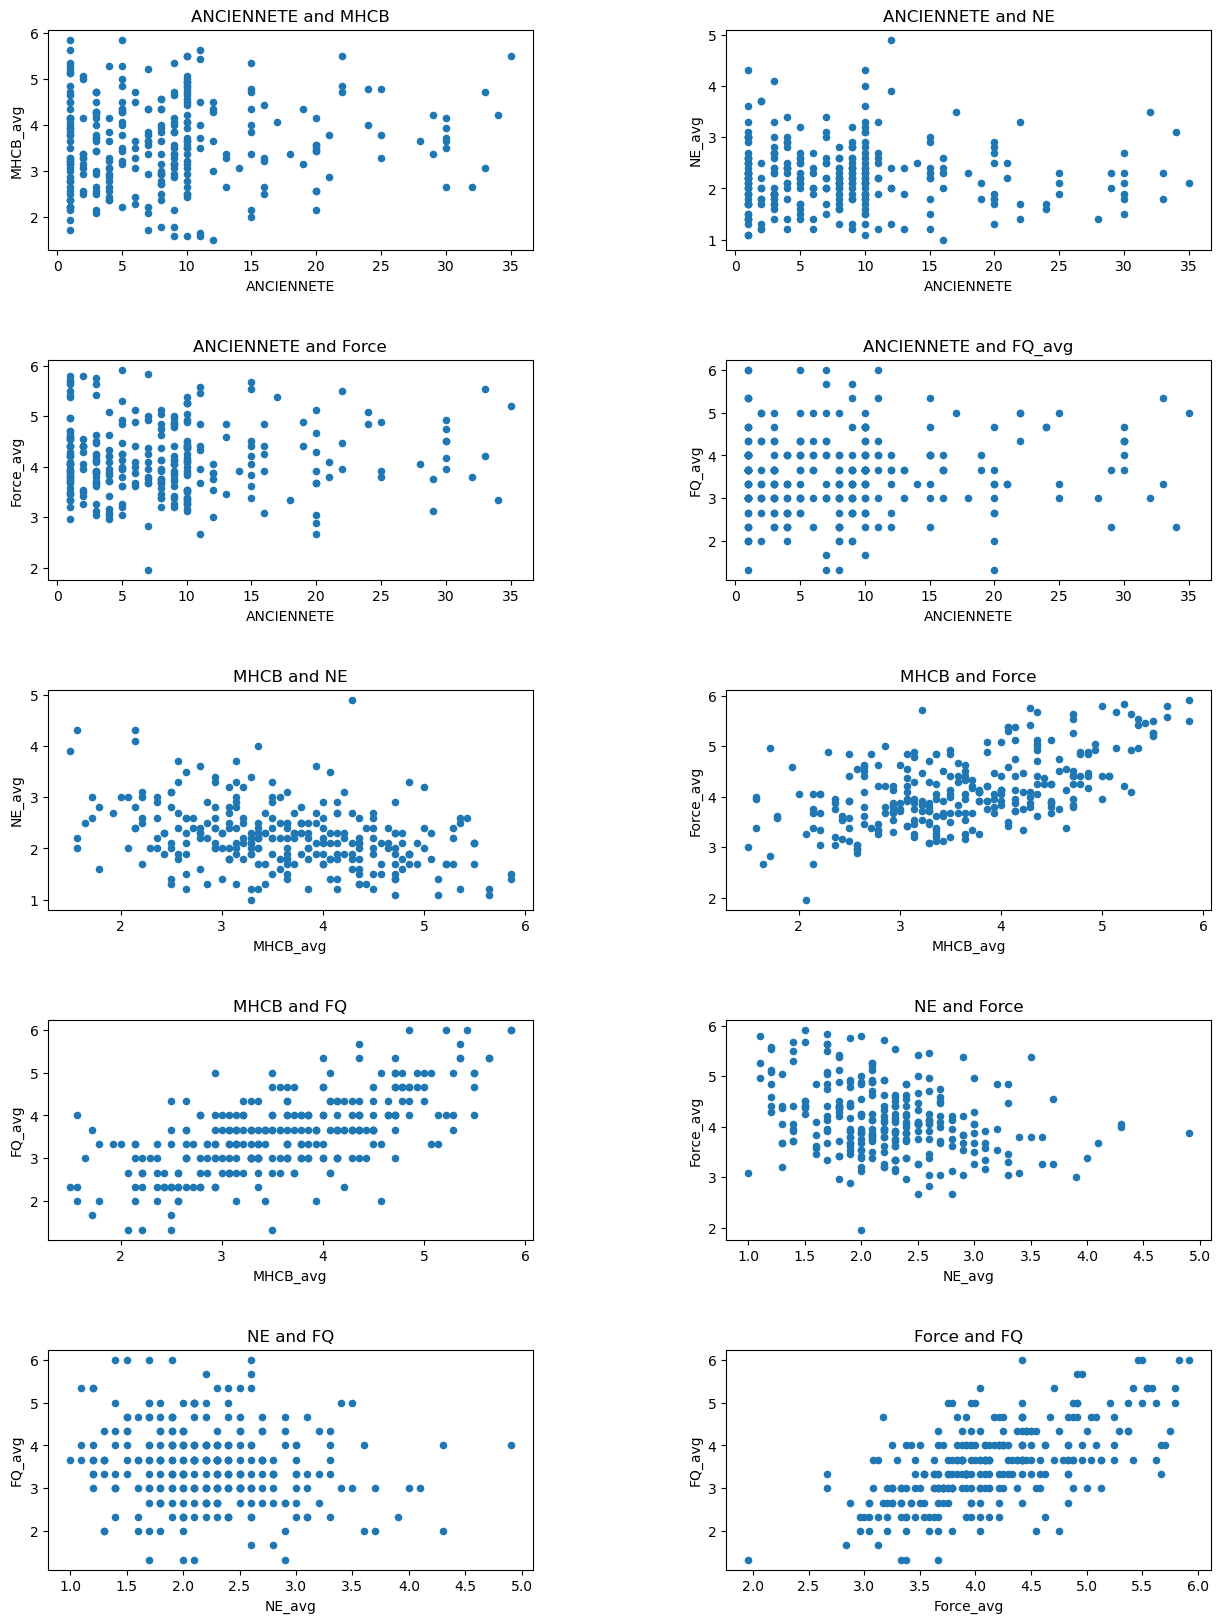

In [155]:
f, axes = plt.subplots(5, 2, figsize=(15, 20))
f.subplots_adjust(hspace=.50, wspace=.40)
df_agg.plot(kind='scatter', x='ANCIENNETE' , y='MHCB_avg' , ax=axes[0][0], title='ANCIENNETE and MHCB')
df_agg.plot(kind='scatter', x='ANCIENNETE' , y='NE_avg' , ax=axes[0][1], title='ANCIENNETE and NE')
df_agg.plot(kind='scatter', x='ANCIENNETE' , y='Force_avg' , ax=axes[1][0], title='ANCIENNETE and Force')
df_agg.plot(kind='scatter', x='ANCIENNETE' , y='FQ_avg' , ax=axes[1][1], title='ANCIENNETE and FQ_avg')
df_agg.plot(kind='scatter', x='MHCB_avg' , y='NE_avg' , ax=axes[2][0], title='MHCB and NE')
df_agg.plot(kind='scatter', x='MHCB_avg' , y='Force_avg' , ax=axes[2][1], title='MHCB and Force')
df_agg.plot(kind='scatter', x='MHCB_avg' , y='FQ_avg' , ax=axes[3][0], title='MHCB and FQ')
df_agg.plot(kind='scatter', x='NE_avg' , y='Force_avg' , ax=axes[3][1], title='NE and Force')
df_agg.plot(kind='scatter', x='NE_avg' , y='FQ_avg' , ax=axes[4][0], title='NE and FQ')
df_agg.plot(kind='scatter', x='Force_avg' , y='FQ_avg' , ax=axes[4][1], title='Force and FQ')


We notice clear positive correlations between :
- MHCB and Force 
- MHCB and FQ 
- Force and FQ

## Non-linear relationships

In [150]:
mod2 = smf.ols('Flux_avg ~ ANCIENNETE + SITUFAM + I(MHCB_avg**2) + NE_avg + (Force_avg * MHCB_avg) + FQ_avg', data = df_agg).fit()
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Flux_avg   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     35.85
Date:                Thu, 23 Mar 2023   Prob (F-statistic):           1.83e-41
Time:                        19:18:50   Log-Likelihood:                -226.15
No. Observations:                 283   AIC:                             472.3
Df Residuals:                     273   BIC:                             508.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           1.5632      0.713      2.192      0.029       0.159       2.967
SITUFAM[T.SEPARATED / DIVORCED]     0.2707      0.083      3.277      0.001       0.108       0.433
SITUFAM[T.SINGLE]                   0.2972      0.100      2.974      0.003       0.100       0.494
ANCIENNETE                          0.0120      0.004      2.748      0.006       0.003       0.021
I(MHCB_avg ** 2)                    0.0207      0.043      0.483      0.629      -0.064       0.105
NE_avg                             -0.1383      0.058     -2.392      0.017      -0.252      -0.024
Force_avg                           0.2416      0.218      1.106      0.270      -0.188       0.672
MHCB_avg                            0.1364      0.230      0.592      0.554      -0.317       0.590
Force_avg:MHCB_avg                 -0.0104      0.059     -0.176      0.860      -0.126       0.106
FQ_avg                              0.2547      0.053      4.838      0.000       0.151       0.358
==============================================================================
Omnibus:                        4.975   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                6.557
Skew:                          -0.076   Prob(JB):                       0.0377
Kurtosis:                       3.730   Cond. No.                         582.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [159]:
mod2 = smf.ols('Flux_avg ~ ANCIENNETE + SITUFAM + MHCB_avg + NE_avg + Force_avg', data = df_agg).fit()
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Flux_avg   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     46.17
Date:                Fri, 24 Mar 2023   Prob (F-statistic):           5.48e-39
Time:                        09:14:22   Log-Likelihood:                -238.20
No. Observations:                 283   AIC:                             490.4
Df Residuals:                     276   BIC:                             515.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           1.2523      0.295      4.250      0.000       0.672       1.832
SITUFAM[T.SEPARATED / DIVORCED]     0.3167      0.085      3.725      0.000       0.149       0.484
SITUFAM[T.SINGLE]                   0.2803      0.103      2.709      0.007       0.077       0.484
ANCIENNETE                          0.0127      0.005      2.814      0.005       0.004       0.022
MHCB_avg                            0.3579      0.044      8.058      0.000       0.270       0.445
NE_avg                             -0.0902      0.058     -1.541      0.124      -0.205       0.025
Force_avg                           0.3440      0.060      5.736      0.000       0.226       0.462
==============================================================================
Omnibus:                        5.604   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                7.628
Skew:                           0.097   Prob(JB):                       0.0221
Kurtosis:                       3.781   Cond. No.                         112.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""